In [46]:
using Pkg; Pkg.activate(".")
using Statistics
using PyPlot
using Glob
using DelimitedFiles
using MUST

MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" 
MUST.@import_dispatch "../../../dispatch2_clean/dispatch2" EOS 
MUST.@get_help visual
pl = pyimport("matplotlib.pylab");

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/solar_model/Project.toml`


In [47]:
solar_model = readdlm("solar_model.txt");

In [50]:
get_teff(folder) = begin
    path = joinpath(folder, "teff.dat")
    if !ispath(path) @warn "$(path) does not exist."
        return nothing
    end
    data = readdlm(path)
end 

get_teff (generic function with 1 method)

In [48]:
folder_best_model           = MUST.@in_dispatch "data/solar_model"
best_snaps, best_snaps_tau  = MUST.Boxes(folder_best_model);

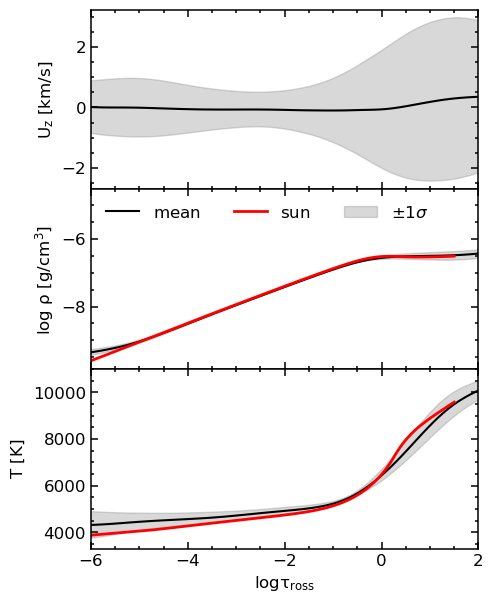

In [49]:
model = best_snaps_tau[end-1]

close("all")
f, ax  = plt.subplots(3,1, sharex=true, figsize=(5,7))
basic_plot!.(ax)
plt.subplots_adjust(hspace=0.0)

z  = MUST.axis(model, :τ_ross)

uz  = MUST.plane_statistic(mean, model, :uz) ./1e5
duz = MUST.plane_statistic(std, model, :uz) ./1e5
r   = MUST.plane_statistic(mean, model, :d)
dr  = MUST.plane_statistic(std, model, :d)
t   = MUST.plane_statistic(mean, model, :T)
dt  = MUST.plane_statistic(std, model, :T)

ax[1].plot(z, uz, color="k")
ax[2].plot(z, log.(10,r), color="k", label=L"\rm mean")
ax[3].plot(z, t, color="k")

ax[1].fill_between(z, uz-duz, uz+duz, color="0.5", alpha=0.3)
ax[2].fill_between(z, log.(10, r-dr), log.(10,r+dr), color="0.5", alpha=0.3, label=L"\pm 1 \sigma")
ax[3].fill_between(z, t-dt, t+dt, color="0.5", alpha=0.3)

ax[2].plot(solar_model[:,2], solar_model[:,end], color="red", lw=2, label=L"\rm sun")
ax[3].plot(solar_model[:,2], solar_model[:,3], color="red", lw=2)

ax[1].set_ylabel(@L_str("\\rm U_z\\ [km/s]"), fontsize="large")
ax[2].set_ylabel(@L_str("\\rm log\\ \\rho\\ [g/cm^3]"), fontsize="large")
ax[3].set_ylabel(@L_str("\\rm T\\ [K]"), fontsize="large");
ax[3].set_xlabel(@L_str("\\rm \\log\\tau_{ross}"), fontsize="large");

ax[3].set_xlim(-6, 2)

ax[3].set_ylim(3300, 11000)

ax[2].legend(framealpha=0, loc="upper left", fontsize="large", ncol=3)

gcf()

In [55]:
tteff = get_teff(folder_best_model);

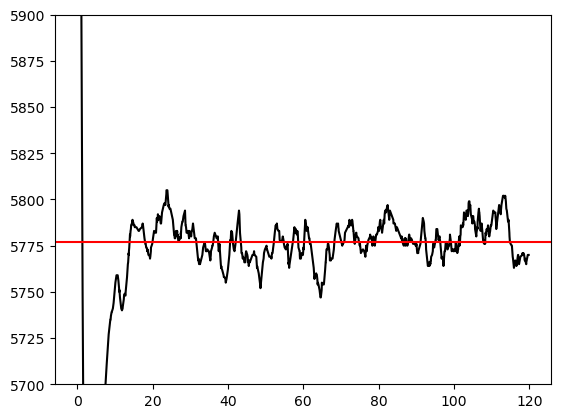

In [62]:
close("all")
plt.plot(tteff[:, 1], tteff[:, 2], color="k")
plt.axhline(5777, color="r")
plt.ylim(5700,5900)
gcf()